# 452-Machine Learning - Prep Assignment

Assessment Questions
Please submit a Github Repository with a Jupyter Notebook that contains the following items:
1.  Loading data into Pandas
2.  Writing an apply function that transforms a column
3.  A basic Data Visualization using Seaborn or Plotly library or Matplotlib
4.  Some type of Machine Learning technique on the data
5.  A script or Makefile that runs https://github.com/computationalmodelling/nbval, and tests the notebook.  Please include output that shows it passes.

The grade will be pass/fail, and if you pass it can take the place of a quiz.  Grading will be on the lenient side and partial credit will be applied as long as you show your work.

Study Material for Course
Many useful materials can be found in this Github repo that I created: https://github.com/noahgift/functional_intro_to_python#python-fundamentals
1.  Please go through:  https://github.com/noahgift/functional_intro_to_python#python-fundamentals
2.  Watch these screencasts:  https://github.com/noahgift/functional_intro_to_python#screencasts-can-be-watched-from-1-4x-speed
3.  Look at a few Juypter notebooks here:  https://github.com/noahgift/functional_intro_to_python#machine-learning-and-data-science-full-jupyter-notebooks
4.  Learn about Plotly here:  https://github.com/noahgift/functional_intro_to_python#plotly
5.  Try to go through and “browse” these notebooks:  https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks.
6.  Get in the habit of using Jupyter notebook.  Ideally, you even learn to take notes in it via Markdown. 

In [2]:
#The assignment is based on the wine quality dataset downloaded from Kaggle
#Link to the data - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data
#The data contains entries for a wine with the chemical composition as columns and the quality marked in numbers
#Higher the quality value, better the wine quality (Generally, >6.5 is considered good qualtiy wine)
#The following code builds a logistic model to predit the quality of a wine given the chemical composition
#Loading the required libraries/packages
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading Data into Pandas

In [6]:
#Importing the input csv file and displaying the first few records
wine_data = pd.read_csv('winequality-red.csv', sep = ',')
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Writing an apply function that transforms a column

In [7]:
#Transforming the quality column to create binary values : 1 = Good Quality, 0 = Poor Quality
wine_data['quality_cat'] = wine_data['quality'].apply(lambda x: 1 if x > 6.5 else 0)
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [37]:
#Checking for missing values
wine_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_cat             0
dtype: int64

In [38]:
#Checking overall structure and dimensions
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
quality_cat             1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


Basic Data Visualization using Seaborn or Plotly library or Matplotlib

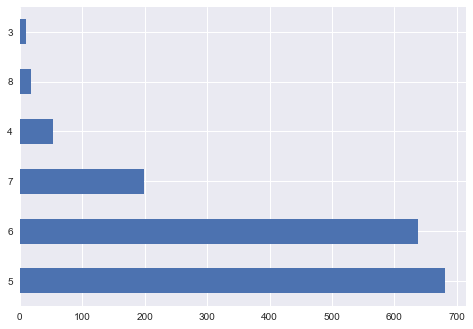

In [39]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
#Plotting the count of wines (data points) for each quality value
wine_data.quality.value_counts().plot(kind='barh')

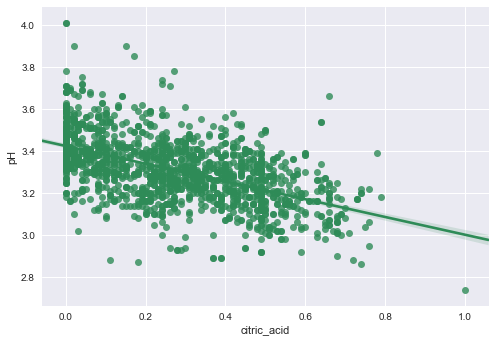

In [20]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
#Visualizing the correlation between Citric Acid and pH values. As expected, higher the acidic content, lower the pH value
sns.regplot("citric_acid", "pH", data=wine_data, robust=True, ci=95, color="seagreen")
sns.despine();

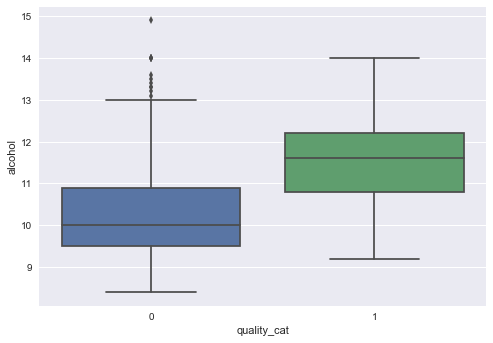

In [40]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
#Visualizing the distribution of alcohol for both good quality and poor quality wines
sns.boxplot(x="quality_cat", y="alcohol", data=wine_data)

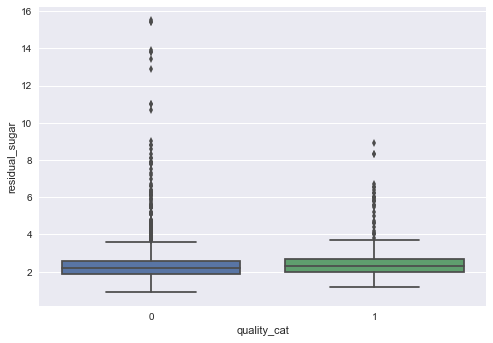

In [41]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
#Visualizing the distribution of residual sugar for both good quality and poor quality wines
sns.boxplot(x="quality_cat", y="residual_sugar", data=wine_data)

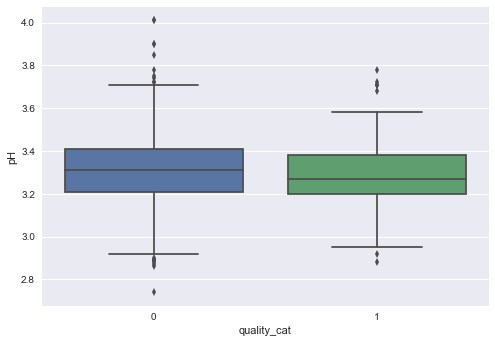

In [42]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
#Visualizing the distribution of pH values for both good quality and poor quality wines
sns.boxplot(x="quality_cat", y="pH", data=wine_data)

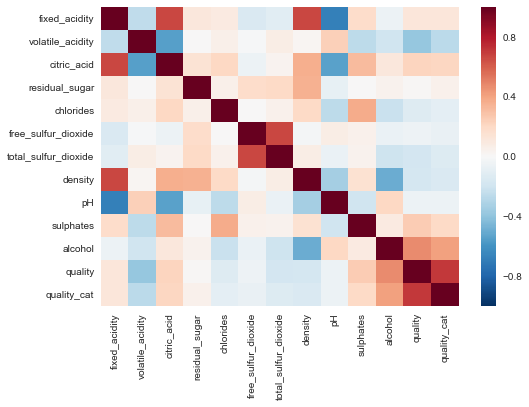

In [43]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
#Checking the correlation between variables through a heat map, so as to treat for multicollinearity
sns.heatmap(wine_data.corr())

Machine Learning technique on the data

In [8]:
#Removing the highly correlated and unnecessary variables
wine_data.drop(['fixed_acidity', 'citric_acid', 'total_sulfur_dioxide', 'quality'],axis=1,inplace=True)
wine_data.head()

,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality_cat
0,0.70,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,0
1,0.88,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,0
2,0.76,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,0
3,0.28,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,0
4,0.70,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,0


In [45]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
volatile_acidity       1599 non-null float64
residual_sugar         1599 non-null float64
chlorides              1599 non-null float64
free_sulfur_dioxide    1599 non-null float64
density                1599 non-null float64
pH                     1599 non-null float64
sulphates              1599 non-null float64
alcohol                1599 non-null float64
quality_cat            1599 non-null int64
dtypes: float64(8), int64(1)
memory usage: 112.5 KB


In [9]:
#Separating the response (y) and explanatory (x) variables
X = wine_data.ix[:,(0,1,2,3,4,5,6,7)].values
y = wine_data.ix[:,8].values

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [10]:
#Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [11]:
#Building the Logistic Regression model using the training dataset
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
#Testing the model with the test dataset
y_pred = LogReg.predict(X_test)

In [13]:
#Creating the confusion matrix to get the accuracy, precision metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[396,  21],
       [ 45,  18]])

In [14]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.95      0.92       417
          1       0.46      0.29      0.35        63

avg / total       0.84      0.86      0.85       480

